# Pymaceuticals Inc.
---

### Observations and Insights
- *Your observations and insights here* ...


In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mudy_data_complete = pd.merge(study_results, mouse_metadata, how="left")

# Display the data table for preview
mudy_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [40]:
#Part 1
#Checking the number of mice.
number_mice= mudy_data_complete["Mouse ID"].nunique()
number_mice=249
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse = mudy_data_complete.loc[mudy_data_complete["Mouse ID" ]=="g989", :]
# Optional: Get all the data for the duplicate mouse ID. 
print(dup_mouse)
dupli_mous_ID = mudy_data_complete.loc[mudy_data_complete["Mouse ID" ]=="g989", :]
dupli_mous_ID
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

mudy_comp_clean_df = mudy_data_complete.loc[mudy_data_complete["Mouse ID" ]!="g989", :]
mudy_comp_clean_df
# Checking the number of mice in the clean DataFrame.
mudy_comp_clean_df["Mouse ID"].nunique()

#part 2

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


#mudy_data_complete.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
#mudy_data_complete.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
#mudy_data_complete.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
#mudy_data_complete.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
#mudy_data_complete.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

#summary_df= #assinging these values to new columns

summary_stats_df=pd.DataFrame({
    "MeanTumVol":mudy_data_complete.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"],
    "MedianTumVol":mudy_data_complete.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"],
    "TumVolVar":mudy_data_complete.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"],
    "TumVolStdDev":mudy_data_complete.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"],
    "TumVolSEM":mudy_data_complete.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"],
})

summary_stats_df


     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   
1195     g989         25           56.045564                 1     Propriva   
1380     g989         30           59.082294        

,MeanTumVol,MedianTumVol,TumVolVar,TumVolStdDev,TumVolSEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [42]:
mice_unique=mudy_data_complete["Mouse ID"].nunique()
mice_unique

249

In [43]:

dupli_mous_ID = mudy_data_complete.loc[mudy_data_complete["Mouse ID" ]=="g989", :]
dupli_mous_ID
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

mudy_comp_clean_df = mudy_data_complete.loc[mudy_data_complete["Mouse ID" ]!="g989", :]
mudy_comp_clean_df
# Checking the number of mice in the clean DataFrame.
mudy_comp_clean_df["Mouse ID"].nunique()

248

In [44]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

mudy_comp_clean_df = mudy_data_complete.loc[mudy_data_complete["Mouse ID" ]!="g989", :]
mudy_comp_clean_df
# Checking the number of mice in the clean DataFrame.
mudy_comp_clean_df["Mouse ID"].nunique()

248

In [45]:
mcc_df= mudy_comp_clean_df
mcc_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [46]:
print(mcc_df[["Mouse ID", "Sex"]])

     Mouse ID     Sex
0        b128  Female
1        f932    Male
2        g107  Female
3        a457  Female
4        c819    Male
...       ...     ...
1888     r944    Male
1889     u364    Male
1890     p438  Female
1891     x773  Female
1892     b879  Female

[1880 rows x 2 columns]


In [47]:
mcc_df["Sex"].value_counts()
#s.value_counts(normalize=True)

Male      958
Female    922
Name: Sex, dtype: int64

In [48]:
male= 958
female= 922
sexTot= 1880
pct_fsex= female/sexTot
pct_fsex

0.49042553191489363

In [49]:
male= 958
female= 922
sexTot= 1880
pct_msex= male/sexTot
pct_msex

0.5095744680851064

In [50]:
df_sex= pct_fsex,pct_msex

## Summary Statistics

Capomulin 	40.675741 	41.557809 	24.947764 	4.994774 	0.329346
Ceftamin 	52.591172 	51.776157 	39.290177 	6.268188 	0.469821
Infubinol 	52.884795 	51.820584 	43.128684 	6.567243 	0.492236
Ketapril 	55.235638 	53.698743 	68.553577 	8.279709 	0.603860
Naftisol 	54.331565 	52.509285 	66.173479 	8.134708 	0.596466
Placebo 	54.033581 	52.288934 	61.168083 	7.821003 	0.581331
Propriva 	52.320930 	50.446266 	43.852013 	6.622085 	0.544332
Ramicane 	40.216745 	40.673236 	23.486704 	4.846308 	0.320955
Stelasyn 	54.233149 	52.431737 	59.450562 	7.710419 	0.573111
Zoniferol

In [53]:



# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


#mudy_data_complete.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
#mudy_data_complete.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
#mudy_data_complete.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
#mudy_data_complete.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
#mudy_data_complete.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

#summary_df= #assinging these values to new columns

summary_stats_df=pd.DataFrame({
    "MeanTumVol":mudy_data_complete.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"],
    "MedianTumVol":mudy_data_complete.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"],
    "TumVolVar":mudy_data_complete.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"],
    "TumVolStdDev":mudy_data_complete.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"],
    "TumVolSEM":mudy_data_complete.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"],
})

summary_stats_df


,MeanTumVol,MedianTumVol,TumVolVar,TumVolStdDev,TumVolSEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [54]:
mudy_data_complete.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [55]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
mudy_data_complete.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]


Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

## Bar and Pie Charts

In [56]:
#data for graphs
summary_stats_df=pd.DataFrame({
    "MeanTumVolCnt":mudy_data_complete.groupby(["Drug Regimen"]).count()["Tumor Volume (mm3)"],
    "MedianTumVolCnt":mudy_data_complete.groupby(["Drug Regimen"]).count()["Tumor Volume (mm3)"],
    "TumVolVarCnt":mudy_data_complete.groupby(["Drug Regimen"]).count()["Tumor Volume (mm3)"],
    "TumVolStdDevCnt":mudy_data_complete.groupby(["Drug Regimen"]).count()["Tumor Volume (mm3)"],
    "TumVolSEMCnt":mudy_data_complete.groupby(["Drug Regimen"]).count()["Tumor Volume (mm3)"],
})

summary_stats_df

,MeanTumVolCnt,MedianTumVolCnt,TumVolVarCnt,TumVolStdDevCnt,TumVolSEMCnt
Drug Regimen,,,,,
Capomulin,230,230,230,230,230
Ceftamin,178,178,178,178,178
Infubinol,178,178,178,178,178
Ketapril,188,188,188,188,188
Naftisol,186,186,186,186,186
Placebo,181,181,181,181,181
Propriva,161,161,161,161,161
Ramicane,228,228,228,228,228
Stelasyn,181,181,181,181,181


In [57]:
230, 178, 178, 188, 186, 181, 161, 228, 181, 182

(230, 178, 178, 188, 186, 181, 161, 228, 181, 182)

In [58]:
%matplotlib notebook

In [59]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
#loc?  




<IPython.core.display.Javascript object>


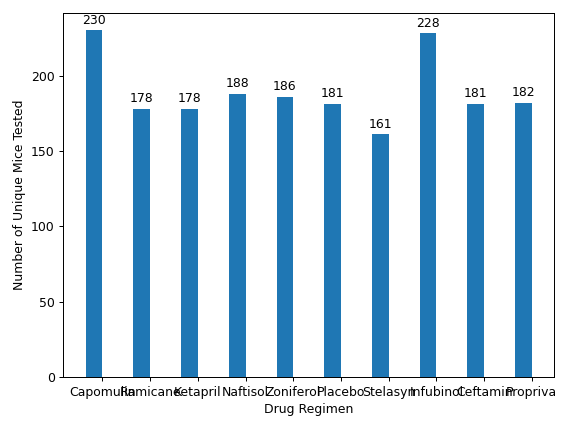

In [60]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using using pyplot.

import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol','Placebo','Stelasyn', 'Infubinol','Ceftamin','Propriva']
men_means = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]
#women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
#rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Unique Mice Tested')
ax.set_xlabel("Drug Regimen")
ax.set_title('')
ax.set_xticks(x)
ax.set_xticklabels(labels)
#ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
#autolabel(rects2)

fig.tight_layout()

plt.show()

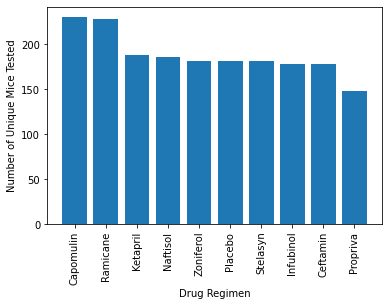

In [20]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using using pyplot.


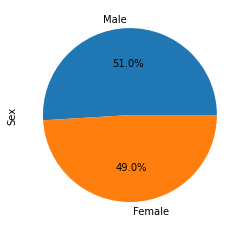

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


In [65]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

(-1.5804346671090896,
 9.503830222243288,
 -12.644397045771798,
 241.5544950974177)

<IPython.core.display.Javascript object>


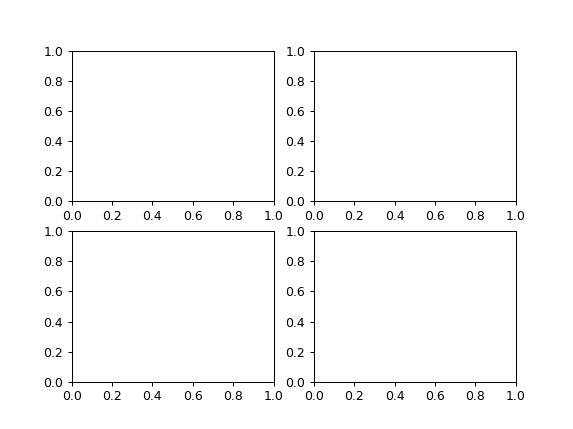

In [62]:
import matplotlib.pyplot as plt

# Some data
labels = 'Men','Women'
fracs = [51,49]

# Make figure and axes
fig, axs = plt.subplots(2, 2)



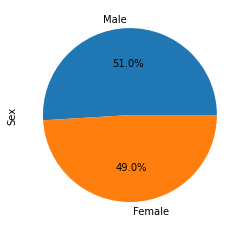

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


<IPython.core.display.Javascript object>


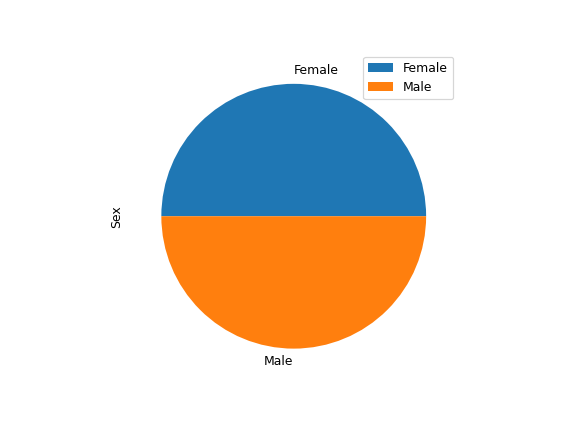

In [63]:
mcc_df.groupby(['Sex']).nunique().plot(kind='pie', y='Sex')



## Quartiles, Outliers and Boxplots

In [64]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

In [65]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    
    # Determine outliers using upper and lower bounds

SyntaxError: unexpected EOF while parsing (<ipython-input-65-505fa9a82f89>, line 14)

In [66]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

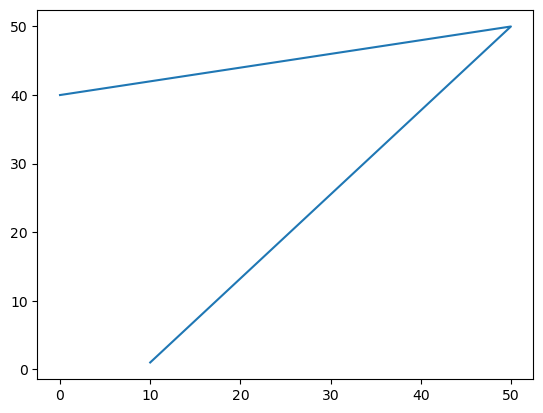

In [102]:


tum = [40, 50, 1]
days = [0, 50, 10]

fig, ax = plt.subplots()
ax.plot(days, tum, label="tum")
#ax.legend()

plt.show()

SyntaxError: invalid syntax (<ipython-input-103-2fb63d85673a>, line 21)

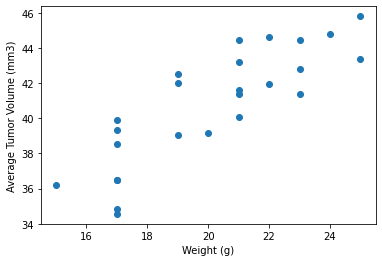

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


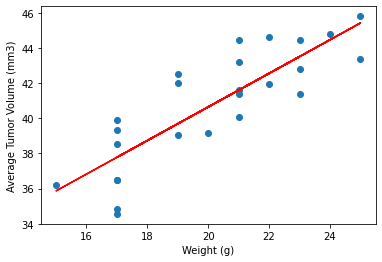

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen